In [144]:
import numpy as np
from sklearn import datasets
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import linear_model
import matplotlib.pyplot as plt

In [165]:
# Load dataset 
iris = datasets.load_iris()
X = iris.data
y = iris.target 

# Seperate into training and testing data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.25)

# Standardize Xs
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training Set Prediction Accuracy: 0.4375
Test Set Prediction Accuracy: 0.4473684210526316
Training Set Prediction Accuracy: 0.2
Training Set Prediction Accuracy: 0.4
Training Set Prediction Accuracy: 0.3333333333333333
Training Set Prediction Accuracy: 0.375
Training Set Prediction Accuracy: 0.44
Training Set Prediction Accuracy: 0.6333333333333333
Training Set Prediction Accuracy: 0.42857142857142855
Training Set Prediction Accuracy: 0.35
Training Set Prediction Accuracy: 0.5333333333333333
Training Set Prediction Accuracy: 0.58
Training Set Prediction Accuracy: 0.23636363636363636


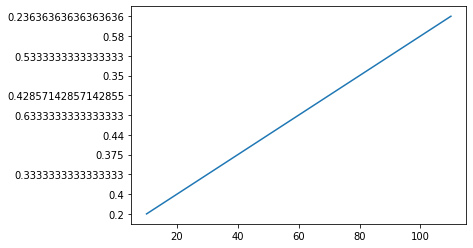

In [164]:
# Baseline: 
# Linear classifier with stochastic gradient descent traning 
# Loss: Square loss 
# Regularization: None 
# Number of iterations: 10,000
clf = linear_model.SGDClassifier(loss="squared_loss", penalty="none", max_iter=10000)
clf.fit(X_train_scaled, y_train)
print("Training Set Prediction Accuracy: " + str(clf.score(X_train_scaled, y_train)))
print("Test Set Prediction Accuracy: " + str(clf.score(X_test_scaled, y_test)))

# Plot learning curve of baseline classifier 
tot_train_examples = X_train_scaled.shape[0]
train_scores = []
test_scores = []
train_sizes = np.arange(10,tot_train_examples,10)
for train_size in train_sizes: 
    X_train_subset = X_train_scaled[:train_size]
    y_train_subset = y_train[:train_size]
    clf.fit(X_train_subset, y_train_subset)
    train_score = str(clf.score(X_train_subset, y_train_subset))
    test_score = str(clf.score(X_test_scaled, y_test))
    print("Training Set Prediction Accuracy: " + train_score)
    print("Test Set Prediction Accuracy: " + test_score)
    train_scores.append(train_score)
    test_scores.append(test_score)
plt.figure()
plt.plot(train_sizes, train_scores)